# Goal

##### Implement Linear Regression using the normal equation as the training algorithm from scratch.
##### Apply the model on Diabetes dataset.

# Tools

In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Loading dataset

In [3]:
diabetes = load_diabetes() 
diabetes.keys() 

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [4]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

# split the data into training and testing sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)

# Implement Linear regression with normal equation

In [6]:
class LinearRegression:
    def __init__(self):
        self.theta = None
    
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1) # add bias term
        self.theta = np.linalg.inv(X.T @ X) @ X.T @ y
        
    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1) # add bias term
        return X @ self.theta


# train the linear regression model

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the testing set

In [8]:
y_pred = model.predict(X_test)

# calculate the mean squared error

In [9]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3424.3166882137343


# Plotting

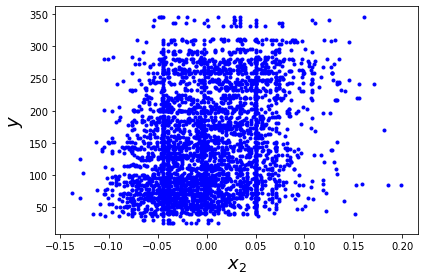

In [13]:
plt.plot(X_train, y_train, "b.")
plt.xlabel("$x_2$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.tight_layout()
plt.show()

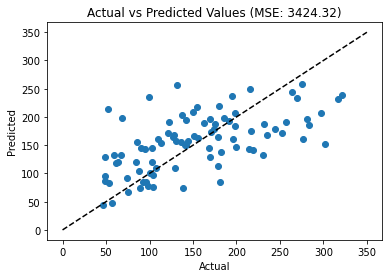

In [20]:
plt.scatter(y_test, y_pred)
plt.plot([0, 350], [0, 350], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (MSE: {:.2f})'.format(mse))
plt.show()

In [19]:
result = pd.DataFrame({'Actual': y_test, 'Predict' : y_pred})
result

,Actual,Predict
0,321.0,238.471452
1,215.0,248.931706
2,127.0,164.054042
3,64.0,120.307944
4,175.0,187.424221
...,...,...
84,104.0,76.773777
85,49.0,94.940469
86,103.0,145.295505
87,142.0,194.037764
